In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec
import os
from sklearn.preprocessing import StandardScaler
import re
import plotly.express as px

In [2]:
Data =pd.read_csv('googleplaystore.csv')

In [3]:
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Cleaning Data 

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Drop some unuse data: Current ver, last updated due to lack of information insight
Data.drop(columns=['Last Updated', 'Current Ver'], inplace=True)

In [6]:
# Check missing value
Data.isna().sum()[Data.isna().sum() > 0]

Rating            1474
Type                 1
Content Rating       1
Android Ver          3
dtype: int64

In [7]:
Data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Data Review

In [8]:
# Rating beyond 5.0, Size small, category unknow => outlier, need to remove
Data[Data.Reviews.str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",NaN


In [9]:
Data.drop(labels=[10472], axis=0,inplace=True)


In [10]:
Data.Reviews = Data.Reviews.astype('int64')

## check for duplicated


In [11]:
# App check duplicated
print('N Unique: {}, N Duplicated: {}'.format(Data.App.nunique(), Data.App.size - Data.App.nunique()))
duplicated_app = Data.App[Data.App.duplicated()]
Data.App[Data.App.duplicated()].head()


N Unique: 9659, N Duplicated: 1181


229    Quick PDF Scanner + OCR FREE
236                             Box
239              Google My Business
256             ZOOM Cloud Meetings
261       join.me - Simple Meetings
Name: App, dtype: object

In [12]:
# They are exactly the same! So we can remove it from dataframe
Data[Data.App == duplicated_app.iloc[0]]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up


In [13]:
Data.drop_duplicates(subset='App', inplace=True)
Data[Data.App == duplicated_app.iloc[0]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,4.0.3 and up


This mean some App are not duplicated, but they are still the same (fake app) 

In [14]:
# Check Again with lower and strip
Data.App = Data.App.str.lower()
Data.App = Data.App.str.strip()
print('Check App are unique:', Data.App.size == Data.App.nunique())
print('N Unique: {}, N Duplicated: {}'.format(Data.App.nunique(), Data.App.size - Data.App.nunique()))
Duplicated_app = Data.App[Data.App.duplicated()]
Data.App[Data.App.duplicated()].head()

Check App are unique: False
N Unique: 9638, N Duplicated: 21


2827          photo frame
3927           4 in a row
4924    ac remote control
4941    ac remote control
5077              applock
Name: App, dtype: object

In [15]:
Data[Data.App == duplicated_app.iloc[3]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver


In [16]:
# Keep the greatest Reviews
Data = Data.sort_values('Reviews', ascending=False).drop_duplicates('App').sort_index()

In [17]:
Data[Data.App == duplicated_app.iloc[3]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver


## Category & Genres



In [18]:
Data.Category = Data.Category.str.lower()
Data.Genres = Data.Genres.str.lower()
Data.Category.nunique()

33

In [19]:
Data.Category = Data.Category.astype('category')
Data.Genres = Data.Genres.astype('category')

## 'video players' and 'video players & editors' are the same



In [20]:
Data[Data.Genres.str.contains('editors')].Genres.unique()

['video players & editors;creativity', 'video players & editors', 'video players & editors;music & video']
Categories (118, object): ['action', 'action;action & adventure', 'adventure', 'adventure;action & adventure', ..., 'video players & editors;creativity', 'video players & editors;music & video', 'weather', 'word']

In [21]:
Data[Data.Genres.str.contains('video players')].Genres.unique()

['video players & editors;creativity', 'video players & editors', 'video players & editors;music & video']
Categories (118, object): ['action', 'action;action & adventure', 'adventure', 'adventure;action & adventure', ..., 'video players & editors;creativity', 'video players & editors;music & video', 'weather', 'word']

## Remove Editors Genre is safety




In [22]:
Data[Data.Genres.str.contains('editors')].Category.unique()


['family', 'video_players']
Categories (33, object): ['art_and_design', 'auto_and_vehicles', 'beauty', 'books_and_reference', ..., 'tools', 'travel_and_local', 'video_players', 'weather']

In [23]:
Data[np.logical_and(Data.Category.str.contains('family').to_numpy(), Data.Genres.str.contains('editors').to_numpy())].Genres.unique()


['video players & editors;creativity', 'video players & editors;music & video']
Categories (118, object): ['action', 'action;action & adventure', 'adventure', 'adventure;action & adventure', ..., 'video players & editors;creativity', 'video players & editors;music & video', 'weather', 'word']

In [24]:
# Category: art_and_design -- Genres: art & design
# 2 different between _and_ -- &
# video players --- video players & editors
def standard_genres_category(text):
    text = re.sub(' & editors', '', text)
    text = re.sub('&', 'and', text)
    text = re.sub(' ', '_', text)
    text = re.sub(';', ' ', text)
    return text

Data.Genres = Data.Genres.apply(standard_genres_category)

In [25]:
def check_unique_genres(series):
    dictionary = set()
    for idx in series:
        for i in idx.split():
            dictionary.add(i)
    return dictionary

dictionary = check_unique_genres(Data.Genres.unique())
print(len(dictionary))

53


## List genres that not in category



In [26]:
np.array(list(filter(lambda x: x not in Data.Category.unique().to_numpy(), dictionary)))


array(['action_and_adventure', 'board', 'role_playing', 'trivia',
       'adventure', 'music_and_video', 'card', 'simulation',
       'educational', 'brain_games', 'casino', 'pretend_play',
       'creativity', 'strategy', 'puzzle', 'music', 'word', 'casual',
       'arcade', 'music_and_audio', 'action', 'racing'], dtype='<U20')

In [27]:
#  Education and educational are the same
Data.Genres = Data.Genres.apply(lambda x: re.sub('educational', 'education', x))
Data.Genres = Data.Genres.apply(lambda x: re.sub('education education', 'education', x))

In [28]:
#Installs
Data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [29]:
Data[Data.Installs == '10+'].head()
#  Most of unkown apps have not rated yet

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
625,house party - live chat,dating,1.0,1,9.2M,10+,Free,0,Mature 17+,dating,4.0.3 and up
630,pet lovers dating,dating,NaN,0,14M,10+,Free,0,Mature 17+,dating,4.1 and up
632,latin dating,dating,NaN,0,13M,10+,Free,0,Mature 17+,dating,4.1 and up
635,wifi mingle,dating,NaN,0,10.0M,10+,Free,0,Everyone,dating,4.4 and up
638,when will you get married,dating,NaN,2,3.6M,10+,Free,0,Everyone,dating,4.0.3 and up


In [30]:
Data.Installs = Data.Installs.apply(lambda x: int(re.sub(',', '', x[:-1] if x != '0' else x)))

def convert_installs(install):
    if install == 10**9:
        return "Billions"
    elif install == 5*10**8:
        return '500 Millions'
    elif install == 10**8:
        return "100 Millions"
    elif install >= 10**6:
        return "Millions"
    elif install >= 10**3:
        return "Thousands"
    else:
        return "Unknown App"

Data.Installs = Data.Installs.apply(convert_installs)
Data.Installs = Data.Installs.astype('category')

In [31]:
Data[Data.Type.isna()]
# safely remove

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
9148,command & conquer: rivals,family,NaN,0,Varies with device,Unknown App,NaN,0,Everyone 10+,strategy,Varies with device


In [32]:
Data.drop(labels=Data[Data.Type.isna()].index[0], axis=0,inplace=True)
Data.Type.unique()

array(['Free', 'Paid'], dtype=object)

## price

In [33]:
Data.Price = Data.Price.apply(lambda x: float(x[1:]) if x != '0' else 0)
Data[Data.Price >= 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
4197,most expensive app (h),family,4.3,6,1.5M,Unknown App,Paid,399.99,Everyone,entertainment,7.0 and up
4362,💎 i'm rich,lifestyle,3.8,718,26M,Thousands,Paid,399.99,Everyone,lifestyle,4.4 and up
4367,i'm rich - trump edition,lifestyle,3.6,275,7.3M,Thousands,Paid,400.00,Everyone,lifestyle,4.1 and up
5351,i am rich,lifestyle,3.8,3547,1.8M,Thousands,Paid,399.99,Everyone,lifestyle,4.0.3 and up
5354,i am rich plus,family,4.0,856,8.7M,Thousands,Paid,399.99,Everyone,entertainment,4.4 and up
5355,i am rich vip,lifestyle,3.8,411,2.6M,Thousands,Paid,299.99,Everyone,lifestyle,4.3 and up
5356,i am rich premium,finance,4.1,1867,4.7M,Thousands,Paid,399.99,Everyone,finance,4.0 and up
5357,i am extremely rich,lifestyle,2.9,41,2.9M,Thousands,Paid,379.99,Everyone,lifestyle,4.0 and up
5358,i am rich!,finance,3.8,93,22M,Thousands,Paid,399.99,Everyone,finance,4.1 and up
5359,i am rich(premium),finance,3.5,472,965k,Thousands,Paid,399.99,Everyone,finance,4.4 and up


Making money is easy, perhaps Or do they launder money?

In [34]:
## remove it
Data.drop(labels=Data[Data.Price >= 100].index, axis=0, inplace=True)

## Content Rating	

In [35]:
Data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [36]:
Data[Data['Content Rating'] =='Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
298,manga master - best manga & comic reader,comics,4.6,24005,4.9M,Thousands,Free,0.0,Adults only 18+,comics,4.1 and up
3043,draftkings - daily fantasy sports,sports,4.5,50017,41M,Millions,Free,0.0,Adults only 18+,sports,4.4 and up
6424,manga books,comics,3.8,7326,Varies with device,Thousands,Free,0.0,Adults only 18+,comics,Varies with device


In [37]:
Data['Content Rating'].value_counts()

Everyone           7867
Teen               1034
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

## Android Ver

In [38]:
Data['Android Ver'].describe()

count           9618
unique            33
top       4.1 and up
freq            2192
Name: Android Ver, dtype: object

In [39]:
Data['Android Ver'].fillna('4.1 and up', inplace=True)


## Rating



In [40]:
Data[Data.Rating.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
23,mcqueen coloring pages,art_and_design,NaN,61,7.0M,Thousands,Free,0.0,Everyone,art_and_design action_and_adventure,4.1 and up
113,wrinkles and rejuvenation,beauty,NaN,182,5.7M,Thousands,Free,0.0,Everyone 10+,beauty,3.0 and up
123,manicure - nail design,beauty,NaN,119,3.7M,Thousands,Free,0.0,Everyone,beauty,4.1 and up
126,skin care and natural beauty,beauty,NaN,654,7.4M,Thousands,Free,0.0,Teen,beauty,4.1 and up
129,"secrets of beauty, youth and health",beauty,NaN,77,2.9M,Thousands,Free,0.0,Mature 17+,beauty,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...
10824,cardio-fr,medical,NaN,67,82M,Thousands,Free,0.0,Everyone,medical,4.4 and up
10825,naruto & boruto fr,social,NaN,7,7.7M,Unknown App,Free,0.0,Teen,social,4.0 and up
10831,payermonstationnement.fr,maps_and_navigation,NaN,38,9.8M,Thousands,Free,0.0,Everyone,maps_and_navigation,4.0 and up
10835,fr forms,business,NaN,0,9.6M,Unknown App,Free,0.0,Everyone,business,4.0 and up


In [41]:
# Define NaN Rating by Reviews and Installs
def standard_rating(Installs, Reviews, Rating):
    if Installs == 'Unknown App' and str(Rating) == 'nan':
        return 0
    elif Installs == 'Thousands' and str(Rating) == 'nan':
        if Reviews >= 100:
            return 2.5
        else:
            return 0.5
    elif str(Rating) == 'nan':
        return 1
    else:
        return Rating


Data.Rating = Data.apply(
    lambda x: standard_rating(
        x.Installs, 
        x.Reviews, 
        x.Rating
        ),
        axis=1
    )

In [42]:
# Check nah
Data.isna().sum()[Data.isna().sum() > 0]


Series([], dtype: int64)

## EDA Tasks

<AxesSubplot:xlabel='Content Rating', ylabel='Installs'>

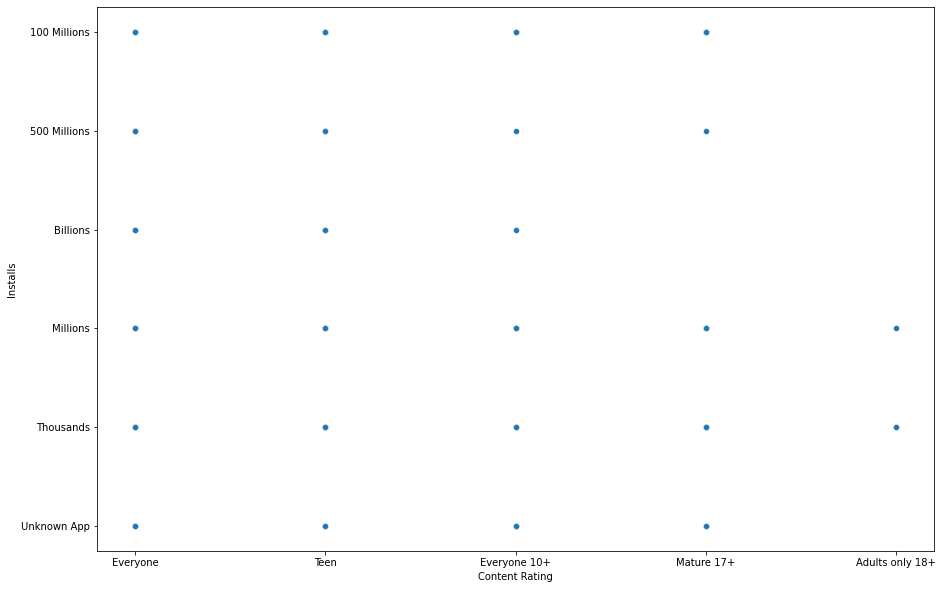

In [43]:
# Removing Unrated apps
content_rating_data = Data.loc[Data['Content Rating'] != 'Unrated']

# Relation ship between installs and label of the app.
plt.figure(figsize = (15, 10))
sns.scatterplot(x = content_rating_data['Content Rating'], y = Data.Installs)

## Visualization

<AxesSubplot:xlabel='Rating', ylabel='Installs'>

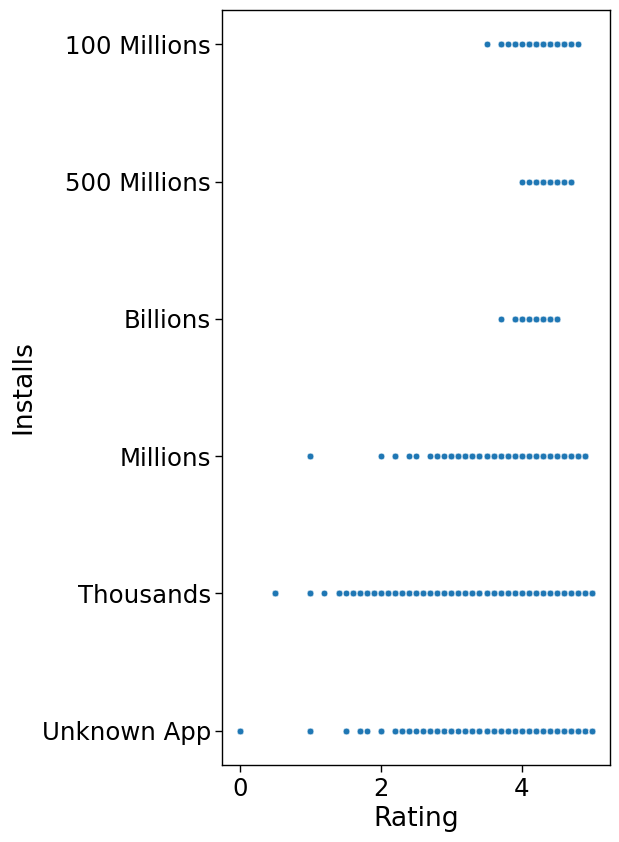

In [44]:
plt.rcParams['figure.dpi'] = 100
sns.set_context('paper', font_scale = 2)
plt.figure(figsize = (5, 10))
sns.scatterplot(x = Data.Rating, y = Data.Installs)

<AxesSubplot:>

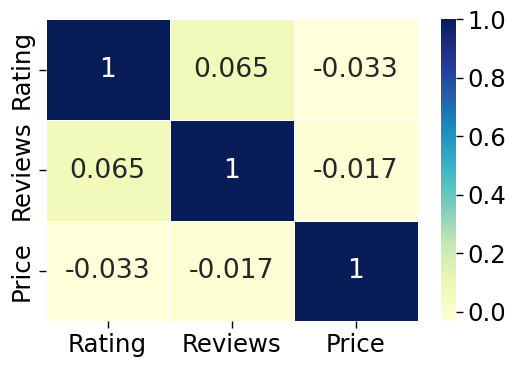

In [48]:
sns.heatmap(Data.corr(), annot=True, linewidths=0.5, cmap="YlGnBu")

In [46]:
px.scatter_matrix(Data,
    dimensions=['Reviews','Installs','Size','Price'],
    color='Rating')

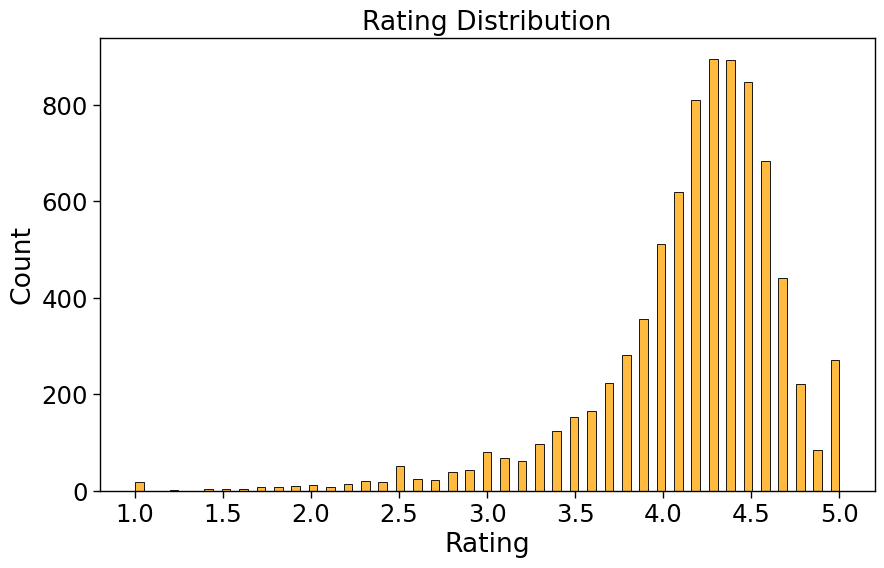

In [49]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(Data[Data.Rating >= 1].Rating, color="orange")
plt.title('Rating Distribution')
plt.show()


 People usually give most of the 4 stars. Personal thinking, I don't believe 5 stars apps

In [50]:
print('Summary')
print('-'*50)
print('Total App in 2018: {} Apps'.format(Data.shape[0]))
print('Total App Reviews in 2018: {} Reviews'.format(Data.Reviews.sum()))
print('Total Categories: {} Categories'.format(Data.Category.nunique()))
print('Total Genres: {} Genres'.format(Data.Genres.nunique()))
print('-'*50)
print('Top verion of android: ver {} '.format(Data['Android Ver'].describe().top))
print('Most Review App: {}'.format(Data.loc[Data.Reviews.nlargest(1).index[0]].App))
print('Largest Size App: {}'.format(Data.loc[Data.Size.nlargest(1).index[0]].App))
print('Top Content Rating: {} ({} Apps)'.format(Data['Content Rating'].describe().top, Data['Content Rating'].value_counts()[0]))
print('-'*50)
print('Optimal Size App (~{}MB to ~{}MB) that have High Rate'.format(Data[Data.Rating >= 4].Size.describe()['25%']/1000,Data[Data.Rating >= 4].Size.describe()['75%']/1000))
print('Optimal Price App (~{:.2f}$ to ~{:.2f}$) that have High Rate'.format(Data[(Data.Rating >= 4) & (Data.Price > 0)].Price.describe()['25%'],Data[(Data.Rating >= 4) & (Data.Price > 0)].Price.describe()['75%']))

Summary
--------------------------------------------------
Total App in 2018: 9620 Apps
Total App Reviews in 2018: 2087100867 Reviews
Total Categories: 33 Categories
Total Genres: 111 Genres
--------------------------------------------------
Top verion of android: ver 4.1 and up 
Most Review App: facebook


TypeError: Cannot use method 'nlargest' with dtype object